In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Optional Notes
Families may have same ticket no. This feature may be helpful to identify groups of passengers.  


In [2]:
df = pd.read_csv('titanic_train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

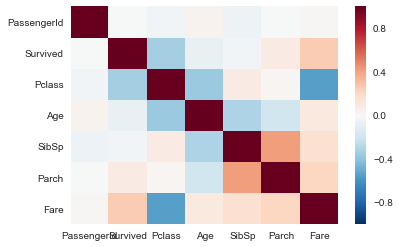

In [6]:
sns.heatmap(df.corr())

In [7]:
# divide into training and test set

In [8]:
tpredictors = df.drop(columns = ['Survived'])
ttarget = df['Survived']

### Handling Missing Values

In [9]:
# categorical variable 'Embarked'

In [10]:
impute_value_embarked = tpredictors['Embarked'].mode()[0]
impute_value_embarked

'S'

In [11]:
tpredictors['Embarked'] = tpredictors['Embarked'].fillna(impute_value_embarked)

In [12]:
tpredictors['Embarked'].isnull().sum()

0

categorical variable 'Cabin'.  

it has too much missing values. check if cabin is high related to class or other feature. it is possible that 3 or both 2 or 3 classes are not allotted cabins, hence missing values. if that is the case, this column might be useful in modeling.

In [13]:
# create new column 'cabin_missing' with 'miss' for nan and 'present' for values


In [14]:
tpredictors['cabin_missing'] = tpredictors['Cabin'].apply(lambda x: 'miss' if pd.isnull(x) else 'present')

/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


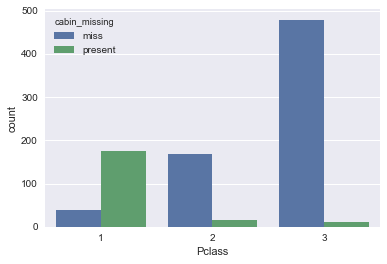

In [15]:
sns.countplot(x = 'Pclass', hue = 'cabin_missing', data = tpredictors)

In [16]:
tpredictors[tpredictors['Pclass'].isin([2, 3]) & ~pd.isnull(tpredictors['Cabin'])]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_missing
10,11,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,present
21,22,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S,present
66,67,2,"Nye, Mrs. (Elizabeth Ramell)",female,29.0,0,0,C.A. 29395,10.5000,F33,S,present
75,76,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S,present
123,124,2,"Webber, Miss. Susan",female,32.5,0,0,27267,13.0000,E101,S,present
128,129,3,"Peter, Miss. Anna",female,NaN,1,1,2668,22.3583,F E69,C,present
148,149,2,"Navratil, Mr. Michel (""Louis M Hoffman"")",male,36.5,0,2,230080,26.0000,F2,S,present
183,184,2,"Becker, Master. Richard F",male,1.0,2,1,230136,39.0000,F4,S,present
193,194,2,"Navratil, Master. Michel M",male,3.0,1,1,230080,26.0000,F2,S,present
205,206,3,"Strom, Miss. Telma Matilda",female,2.0,0,1,347054,10.4625,G6,S,present


2 and 3 classes also had cabins. Lets drop 'cabin' column for now.

In [17]:
df['cabin_missing'] = df['Cabin'].apply(lambda x: 'miss' if pd.isnull(x) else 'present')

/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


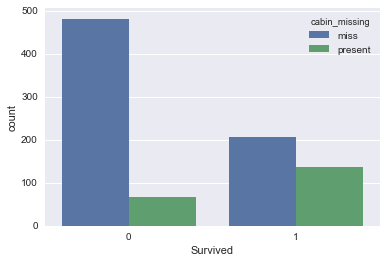

In [18]:
sns.countplot(x = 'Survived', hue = 'cabin_missing', data = df)

not so sginificant. ya, drop 'Cabin' and 'cabin_missing' columns

In [19]:
tpredictors.drop(columns=['Cabin', 'cabin_missing'], inplace=True)

'Cabin' is dropped and 'Embarked' is imputed. Now tackle numerical column with missing values. 'Age'

In [20]:
tpredictors['Age'].isnull().sum()

177

In [21]:
age_fill_data = tpredictors.groupby(by=['Pclass', 'Sex']).mean()['Age']
age_fill_data

Pclass  Sex   
1       female    34.611765
        male      41.281386
2       female    28.722973
        male      30.740707
3       female    21.750000
        male      26.507589
Name: Age, dtype: float64

In [22]:
age_fill_data[1]['male']

41.281386138613861

In [23]:
tpredictors['Age'] = tpredictors.apply(lambda x: int(age_fill_data[x['Pclass']][x['Sex']]) if pd.isnull(x['Age']) else x['Age'], axis=1)

In [24]:
tpredictors.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [25]:
tpredictors.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

All missing values have been sorted out.

### Outlier Analysis

In [26]:
num_column_list = tpredictors.select_dtypes(include=np.number).columns
num_column_list

Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)
/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


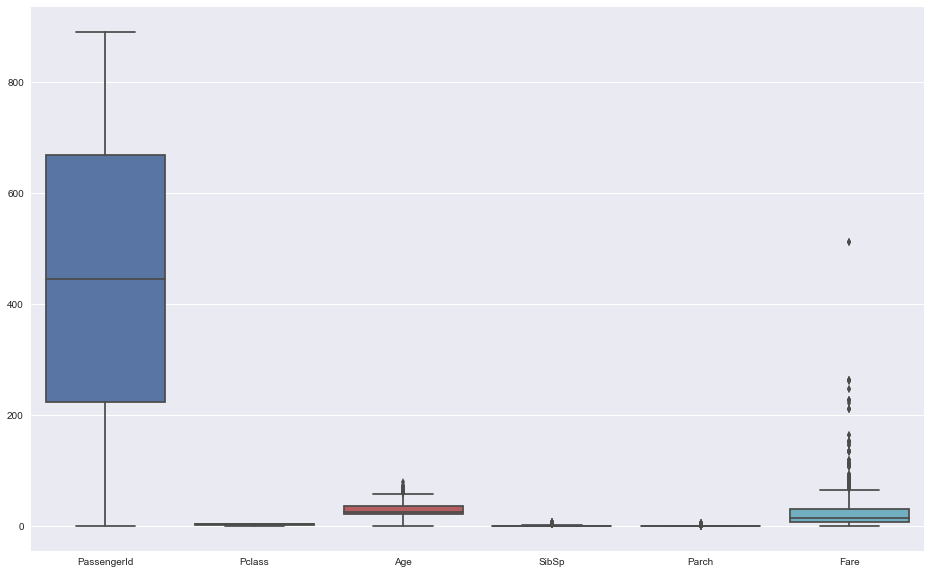

In [27]:
plt.figure(figsize=(16,10))
sns.boxplot(tpredictors[num_column_list])

In [28]:
len(tpredictors[tpredictors['Fare']>500])

3

In [29]:
len(tpredictors[tpredictors['Fare']>100])

53

/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


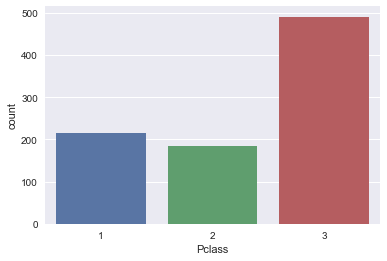

In [30]:
sns.countplot(tpredictors['Pclass'])

Age is under 90, so they are not real outliers.  
Fare is expensive for first class, hence not real outliers.

### Feature Selection and Extraction

In [31]:
# PassengerId column is irrelevant, it should be dropped.
tpredictors.drop(columns=['PassengerId'], inplace=True)
tpredictors.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [32]:
# Lets check if Ticket gives any relevant information

In [33]:
ticket_companions = tpredictors['Ticket'].value_counts()

In [34]:
tpredictors['Companions'] = tpredictors['Ticket'].apply(lambda x: ticket_companions[x]-1)

In [35]:
tpredictors.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Companions
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


In [36]:
sum(tpredictors['SibSp'] + tpredictors['Parch'] - tpredictors['Companions'])

104

The info in 'Companions' might be relevant but it is not practical to include it. There will be problem in updating this column with test data. So, its better to drop both 'Ticket'' and 'Companions' columns.

In [37]:
tpredictors.drop(columns=['Ticket', 'Companions'], inplace=True)

In [38]:
tpredictors.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


'Name' column can give info if passenger is a child or adult.

In [39]:
titles = tpredictors['Name'].apply(lambda x: x.split(',')[1].strip().split()[0] if len(x.split(',')) > 1 else np.nan)

In [40]:
titles.value_counts()

Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Major.         2
Col.           2
Mlle.          2
Capt.          1
Ms.            1
Sir.           1
Lady.          1
Jonkheer.      1
the            1
Don.           1
Mme.           1
Name: Name, dtype: int64

If title is 'Master.' the passenger is child. For female passengers, if title is 'Miss.' and age < 14 qualifies for child. Since more than 175 values for age have been estimated, it is better approach to decide if a passenger is child or adult.

In [41]:
tpredictors['title'] = tpredictors['Name'].apply(lambda x: x.split(',')[1].strip().split()[0] if len(x.split(',')) > 1 else np.nan)
tpredictors.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,title
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr.
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs.
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss.
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs.
4,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr.


In [42]:
def child_or_not(x):
    if x['title'] == 'Master.':
        return 1
    elif x['title'] == 'Miss.' and x['Age'] <=14:
        return 1
    else:
        return 0

In [43]:
tpredictors['is_child'] = tpredictors.apply(child_or_not, axis=1)
tpredictors.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,title,is_child
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr.,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs.,0
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss.,0
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs.,0
4,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr.,0


In [44]:
# Now 'Name' and 'title' columns should be dropped.
tpredictors.drop(columns=['Name','title'], inplace=True)
tpredictors.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,is_child
0,3,male,22.0,1,0,7.2500,S,0
1,1,female,38.0,1,0,71.2833,C,0
2,3,female,26.0,0,0,7.9250,S,0
3,1,female,35.0,1,0,53.1000,S,0
4,3,male,35.0,0,0,8.0500,S,0


one hot encoding for categorical data

In [45]:
tpredictors = pd.get_dummies(tpredictors, drop_first=True)
tpredictors.head()

,Pclass,Age,SibSp,Parch,Fare,is_child,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0
2,3,26.0,0,0,7.9250,0,0,0,1
3,1,35.0,1,0,53.1000,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,1


Pclass should also be encoded

In [46]:
pclass_dummies = pd.get_dummies(df['Pclass'], drop_first=True)

In [47]:
tpredictors = pd.concat([tpredictors, pclass_dummies], axis=1)
tpredictors.head()

,Pclass,Age,SibSp,Parch,Fare,is_child,Sex_male,Embarked_Q,Embarked_S,2,3
0,3,22.0,1,0,7.2500,0,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0,0
2,3,26.0,0,0,7.9250,0,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,0,1,0,0
4,3,35.0,0,0,8.0500,0,1,0,1,0,1


In [48]:
tpredictors.drop('Pclass', axis=1, inplace=True)
tpredictors.head()

,Age,SibSp,Parch,Fare,is_child,Sex_male,Embarked_Q,Embarked_S,2,3
0,22.0,1,0,7.2500,0,1,0,1,0,1
1,38.0,1,0,71.2833,0,0,0,0,0,0
2,26.0,0,0,7.9250,0,0,0,1,0,1
3,35.0,1,0,53.1000,0,0,0,1,0,0
4,35.0,0,0,8.0500,0,1,0,1,0,1


In [49]:
tpredictors['SibSpParch'] = tpredictors['SibSp'] + tpredictors['Parch']
tpredictors.head()

,Age,SibSp,Parch,Fare,is_child,Sex_male,Embarked_Q,Embarked_S,2,3,SibSpParch
0,22.0,1,0,7.2500,0,1,0,1,0,1,1
1,38.0,1,0,71.2833,0,0,0,0,0,0,1
2,26.0,0,0,7.9250,0,0,0,1,0,1,0
3,35.0,1,0,53.1000,0,0,0,1,0,0,1
4,35.0,0,0,8.0500,0,1,0,1,0,1,0


In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
logm = LogisticRegression()

In [52]:
from sklearn.model_selection import cross_val_score

In [53]:
cross_val_score(logm, tpredictors, ttarget, cv=5)

array([ 0.81564246,  0.81005587,  0.78651685,  0.76966292,  0.84180791])

In [51]:
from sklearn.tree import DecisionTreeClassifier

In [55]:
dtree = DecisionTreeClassifier()

In [56]:
cross_val_score(dtree, tpredictors, ttarget)

array([ 0.75757576,  0.79461279,  0.78114478])

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
rforest = RandomForestClassifier(n_estimators = 50)

In [59]:
cross_val_score(rforest, tpredictors, ttarget, cv=5)

array([ 0.81005587,  0.81005587,  0.84269663,  0.76404494,  0.82485876])

In [54]:
from sklearn.preprocessing import StandardScaler

In [55]:
from sklearn.pipeline import make_pipeline

In [62]:
logm_scaler = make_pipeline(StandardScaler(), LogisticRegression())

In [63]:
cross_val_score(logm_scaler, tpredictors, ttarget, cv=5)

array([ 0.81005587,  0.81564246,  0.78651685,  0.78651685,  0.84745763])

In [64]:
dtree_scaler = make_pipeline(StandardScaler(), DecisionTreeClassifier())

In [65]:
cross_val_score(dtree_scaler, tpredictors, ttarget, cv=5)

array([ 0.75977654,  0.7877095 ,  0.81460674,  0.78089888,  0.79661017])

In [66]:
rforest_scaler = make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators = 50))

In [67]:
cross_val_score(rforest_scaler, tpredictors, ttarget, cv=5)

array([ 0.79329609,  0.79888268,  0.84269663,  0.79213483,  0.82485876])

In [56]:
from xgboost import XGBClassifier

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
from sklearn import metrics

In [69]:
Xtrain, Xtest, ytrain, ytest = train_test_split(tpredictors, ttarget, test_size=0.3)

In [119]:
cross_val_score(XGBClassifier(), tpredictors, ttarget, cv=5)

array([ 0.83240223,  0.81005587,  0.84269663,  0.81460674,  0.84745763])

In [106]:
xg = XGBClassifier(n_estimators=500, learning_rate=0.4)
xg.fit(Xtrain, ytrain)
xg.score(Xtest, ytest)

0.80223880597014929

In [120]:
est = [1000]
lrate = [0.07, 0.05, 0.04, 0.03, 0.025]

In [121]:
for e in est:
    for r in lrate:
        xg = XGBClassifier(n_estimators=e, learning_rate=r)
        xg.fit(Xtrain, ytrain)
        print("n_estimators: {}\tlearning_rate:{}\tscore:{}".format(e, r, xg.score(Xtest, ytest)))

n_estimators: 1000	learning_rate:0.07	score:0.8171641791044776
n_estimators: 1000	learning_rate:0.05	score:0.8246268656716418
n_estimators: 1000	learning_rate:0.04	score:0.8246268656716418
n_estimators: 1000	learning_rate:0.03	score:0.8246268656716418
n_estimators: 1000	learning_rate:0.025	score:0.8283582089552238


In [60]:
from sklearn.ensemble import AdaBoostClassifier

In [123]:
cross_val_score(AdaBoostClassifier(), tpredictors, ttarget, cv=5)

array([ 0.7877095 ,  0.82122905,  0.80337079,  0.81460674,  0.84180791])

In [129]:
ada_est = [1000]
ada_rate = [0.3, 0.05]

In [130]:
for e in ada_est:
    for r in ada_rate:
        ab = AdaBoostClassifier(n_estimators=e, learning_rate=r)
        ab.fit(Xtrain, ytrain)
        print("n_estimators: {}\tlearning_rate:{}\tscore:{}".format(e, r, ab.score(Xtest, ytest)))

n_estimators: 1000	learning_rate:0.3	score:0.8134328358208955
n_estimators: 1000	learning_rate:0.05	score:0.8097014925373134


In [61]:
from sklearn.naive_bayes import GaussianNB

In [132]:
cross_val_score(GaussianNB(), tpredictors, ttarget, cv=5)

array([ 0.72067039,  0.81005587,  0.80898876,  0.79775281,  0.85875706])

In [62]:
from sklearn.naive_bayes import MultinomialNB

In [134]:
cross_val_score(MultinomialNB(), tpredictors, ttarget, cv=5)

array([ 0.58659218,  0.72625698,  0.70224719,  0.73595506,  0.71751412])

In [63]:
from sklearn.naive_bayes import BernoulliNB

In [136]:
cross_val_score(BernoulliNB(), tpredictors, ttarget, cv=5)

array([ 0.66480447,  0.75977654,  0.80898876,  0.74157303,  0.80225989])

In [64]:
from sklearn.svm import SVC

In [138]:
cross_val_score(SVC(), tpredictors, ttarget, cv=5)

array([ 0.64804469,  0.66480447,  0.7247191 ,  0.75842697,  0.71751412])

In [139]:
svc_scaler = make_pipeline(StandardScaler(), SVC())

In [140]:
cross_val_score(svc_scaler, tpredictors, ttarget, cv=5)

array([ 0.84357542,  0.83240223,  0.8258427 ,  0.79775281,  0.86440678])

In [143]:
for c in [1]:
    for g in [0.06]:
        svcc = make_pipeline(StandardScaler(), SVC(C = c, gamma = g))
        svcc.fit(Xtrain, ytrain)
        print("C: {}\tgamma: {}\t\tscore: {}".format(c, round(g,4), svcc.score(Xtest, ytest)))

C: 1	gamma: 0.06		score: 0.8432835820895522


SVC best parameters: C = 1, gamma = 0.06)

In [65]:
from sklearn.ensemble import VotingClassifier

In [108]:
lr_ens = LogisticRegression()
rf_ens = RandomForestClassifier()
nvgb_ens = GaussianNB()
svc_ens = make_pipeline(StandardScaler(), SVC(C=1, gamma=0.06, probability=True))

In [104]:
vc1 = VotingClassifier(estimators=[('cl1',lr_ens), ('cl2',rf_ens), ('cl3',nvgb_ens), ('cl4',svc_ens)], voting='soft')

In [105]:
vc1.fit(Xtrain, ytrain)
vc1.score(Xtest, ytest)

0.82462686567164178

In [182]:
lr_ens2 = LogisticRegression(random_state=1)
rf_ens2 = RandomForestClassifier(random_state=1)
nvgb_ens2 = GaussianNB()
svc_ens2 = SVC(C=1, gamma=0.06, probability=True, random_state=1)
xg_ens2 = XGBClassifier(n_estimators=1000, learning_rate=0.025, random_state=1)

In [110]:
sc = StandardScaler()
sc.fit(Xtrain)
Xtrain_std = sc.transform(Xtrain)
Xtest_std = sc.transform(Xtest)

In [189]:
vc2 = VotingClassifier(estimators=[('svc',svc_ens2), ('xg',xg_ens2), ('lr',lr_ens2), ('rf',rf_ens2), ('nvgb',nvgb_ens2)], voting='soft', weights=[2,1.7,1,1,0.7])

In [190]:
vc2.fit(Xtrain_std, ytrain)
vc2.score(Xtest_std, ytest)

0.83208955223880599

### Finally SVC(C=1, gamma=0.6) is selected!